In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
# Charger les données depuis le fichier CSV
chemin_fichier = './data/transformed_data.csv'
data = pd.read_csv(chemin_fichier, index_col=0)

# Afficher les premières lignes du dataset
print("Aperçu des données :\n", data.head())

Aperçu des données :
              PAO        PAA         VIO         VIA        POT        LEC  \
AGRI  167.167666   1.370000  162.740161   23.093603  40.954133   7.897569   
SAAG  162.168585   2.202318  140.814126   12.330000  39.954498  11.875952   
PRIN  119.176494   6.011267   69.056197   56.002902  38.954863   4.913782   
CSUP   87.490000  10.500000   63.470000  110.790000  27.270000   2.950000   
CMOY  103.179437   5.059030   68.059559   76.945183  31.957418   3.919186   

            RAI        PLP  
AGRI   6.178826   5.670046  
SAAG   4.190000  14.731248  
PRIN  13.172333  40.620000  
CSUP  17.970000  38.894453  
CMOY  11.174188  29.833251  


In [23]:
# Exclure la colonne catégorielle "Index"
donnees_numeriques = data

# Calculer les indicateurs statistiques
statistiques = donnees_numeriques.describe().loc[['min', 'max', 'mean', 'std']].T
print("Indicateurs statistiques :\n", statistiques)

Indicateurs statistiques :
            min         max        mean        std
PAO  87.490000  167.167666  127.338452  27.836951
PAA   1.370000   10.500000    4.920933   2.934740
VIO  63.470000  162.740161   96.139204  38.612201
VIA  12.330000  110.790000   58.888054  31.171281
POT  27.270000   52.949753   38.618845   7.804947
LEC   2.950000   11.875952    6.533176   2.805353
RAI   4.190000   17.970000   10.276453   4.398496
PLP   5.670046   40.620000   24.133993  12.274433


In [24]:
# Calculer la matrice de corrélation
matrice_correlation = donnees_numeriques.corr()
print("Matrice de corrélation :\n", matrice_correlation)

Matrice de corrélation :
           PAO       PAA       VIO       VIA       POT       LEC       RAI  \
PAO  1.000000 -0.770111  0.926000 -0.905335  0.652829  0.888166 -0.832702   
PAA -0.770111  1.000000 -0.600207  0.905329 -0.314223 -0.674030  0.959853   
VIO  0.926000 -0.600207  1.000000 -0.748743  0.515050  0.791052 -0.669290   
VIA -0.905335  0.905329 -0.748743  1.000000 -0.412792 -0.837255  0.923544   
POT  0.652829 -0.314223  0.515050 -0.412792  1.000000  0.599760 -0.398626   
LEC  0.888166 -0.674030  0.791052 -0.837255  0.599760  1.000000 -0.824395   
RAI -0.832702  0.959853 -0.669290  0.923544 -0.398626 -0.824395  1.000000   
PLP -0.858791  0.773906 -0.828666  0.723656 -0.554423 -0.752085  0.837898   

          PLP  
PAO -0.858791  
PAA  0.773906  
VIO -0.828666  
VIA  0.723656  
POT -0.554423  
LEC -0.752085  
RAI  0.837898  
PLP  1.000000  


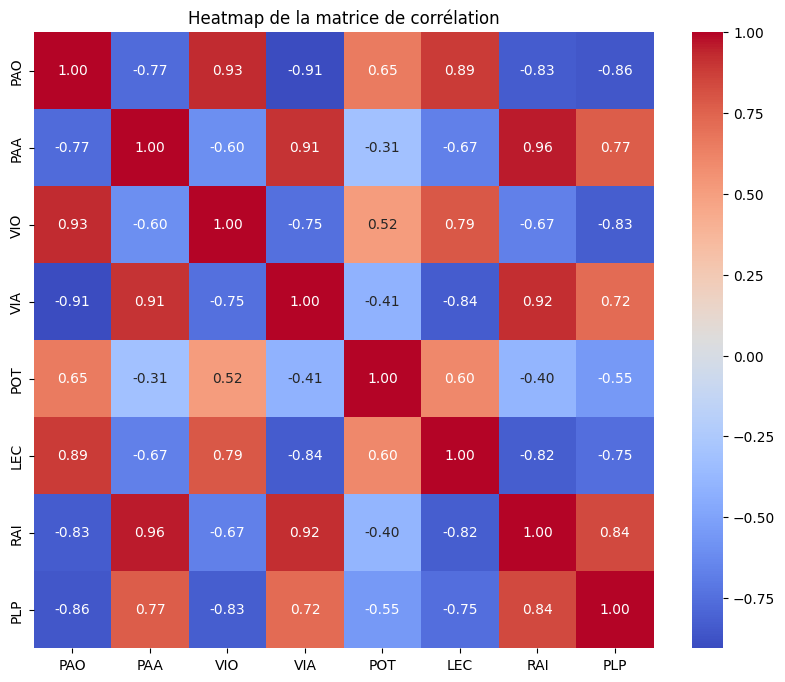

In [25]:
# Afficher une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matrice de corrélation')
plt.show()

In [27]:
# Effectuer l'ACP
acp = PCA()
acp.fit(donnees_numeriques)

# Extraire les valeurs propres et la variance expliquée
valeurs_propres = acp.explained_variance_
variance_expliquee = acp.explained_variance_ratio_
variance_cumulee = variance_expliquee.cumsum()

# Créer un tableau des valeurs propres avec le format souhaité
tableau_valeurs_propres = pd.DataFrame({
    'N°': range(1, len(valeurs_propres) + 1),
    'Valeur Propre': valeurs_propres,
    'Pour-cent': variance_expliquee * 100,
    'Cumul': variance_cumulee * 100
})

# Formater les valeurs numériques
tableau_valeurs_propres['Valeur Propre'] = tableau_valeurs_propres['Valeur Propre'].map('{:.4f}'.format)
tableau_valeurs_propres['Pour-cent'] = tableau_valeurs_propres['Pour-cent'].map('{:.3f}'.format)
tableau_valeurs_propres['Cumul'] = tableau_valeurs_propres['Cumul'].map('{:.3f}'.format)

print("Tableau des valeurs propres :\n", tableau_valeurs_propres)

Tableau des valeurs propres :
    N° Valeur Propre Pour-cent    Cumul
0   1     3072.0439    88.154   88.154
1   2      302.9593     8.694   96.848
2   3       67.7290     1.944   98.791
3   4       38.3067     1.099   99.890
4   5        2.1263     0.061   99.952
5   6        1.6381     0.047   99.999
6   7        0.0517     0.001  100.000
7   8        0.0000     0.000  100.000


In [7]:
# Sélectionner les deux axes principaux avec les plus grandes valeurs propres
axes_principaux = acp.components_[:2]
print("Les 2 axes principaux :\n", axes_principaux)

Les 2 axes principaux :
 [[ 0.49620433 -0.04441498  0.66688264 -0.50851371  0.07949412  0.04442889
  -0.06654125 -0.18912681]
 [-0.0717973   0.08797802  0.62631447  0.7591994   0.04589115 -0.02140562
   0.10769038 -0.06549857]]


In [8]:
# Projeter les individus sur les deux premiers axes
individus_acp = acp.transform(donnees_numeriques)

# Créer un tableau des individus avec leurs coordonnées sur les deux premiers axes
tableau_individus = pd.DataFrame(individus_acp[:, :2], columns=['F1', 'F2'], index=data.index)
print("Tableau des individus :\n", tableau_individus)

Tableau des individus :
               F1         F2
AGRI   86.798537  12.283542
SAAG   73.724496 -10.335987
PRIN  -24.086768 -19.216460
CSUP  -73.154171  21.680590
CMOY  -41.714703  -2.633538
EMPL  -28.746831  -9.069552
OUVR   -6.258790 -17.790686
INAC   13.438228  25.082091


In [9]:
# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
for i, variable in enumerate(donnees_numeriques.columns):
    ax.arrow(0, 0, axes_principaux[0, i], axes_principaux[1, i], color='blue', alpha=0.5)
    ax.text(axes_principaux[0, i], axes_principaux[1, i], variable, color='black', ha='center', va='center')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de corrélation')
plt.grid()
plt.show()

In [10]:
# Calculer les corrélations entre les variables initiales et les composantes principales
correlations = pd.DataFrame(acp.components_.T, columns=[f'CP{i+1}' for i in range(acp.n_components_)], index=donnees_numeriques.columns)
print("Corrélations entre les variables et les composantes principales :\n", correlations)

Corrélations entre les variables et les composantes principales :
           CP1       CP2       CP3       CP4       CP5       CP6       CP7  \
PAO  0.496204 -0.071797  0.415313  0.211764  0.501452  0.348907  0.012270   
PAA -0.044415  0.087978 -0.010104  0.166312  0.073053  0.549259 -0.581728   
VIO  0.666883  0.626314 -0.323221  0.058114 -0.171345 -0.142573 -0.021711   
VIA -0.508514  0.759199  0.239833 -0.025564  0.117047  0.122939  0.002534   
POT  0.079494  0.045891  0.729694  0.353234 -0.366735 -0.359817 -0.043228   
LEC  0.044429 -0.021406  0.047889  0.022567 -0.607066  0.639877  0.460533   
RAI -0.066541  0.107690 -0.045376  0.227053  0.438220 -0.001775  0.665988   
PLP -0.189127 -0.065499 -0.358630  0.864077 -0.071342 -0.047152 -0.058863   

          CP8  
PAO  0.397438  
PAA -0.563112  
VIO -0.070650  
VIA  0.279350  
POT -0.261753  
LEC  0.068580  
RAI -0.542939  
PLP  0.271880  
